In [39]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines

import os

In [32]:
# Read in MCMC results

true_vals = np.array([1e6, 10, 0.9,8.05,0.1, np.cos(1), 1.0, 0.2, 0.2, 0.8, 0.8, 2, 3, 1.5]) # From MCMC, injection parameters

samples_14D = np.load("data_files/MCMC_results/samples_14D.npy"); N_params_14D = len(samples_14D) # Read in already processed samples


In [35]:
# Read in FM results

Gamma_14D = np.load("data_files/FM_results/Fisher_Ndeltas16_Order8_Full_Ollie.npy") 
Gamma_inv_14D = np.linalg.inv(Gamma_14D) # Construct FM inv
FM_samples_14D = np.random.multivariate_normal(true_vals, Gamma_inv_14D, len(samples_14D[0])) # Draw samples, much easier this way.


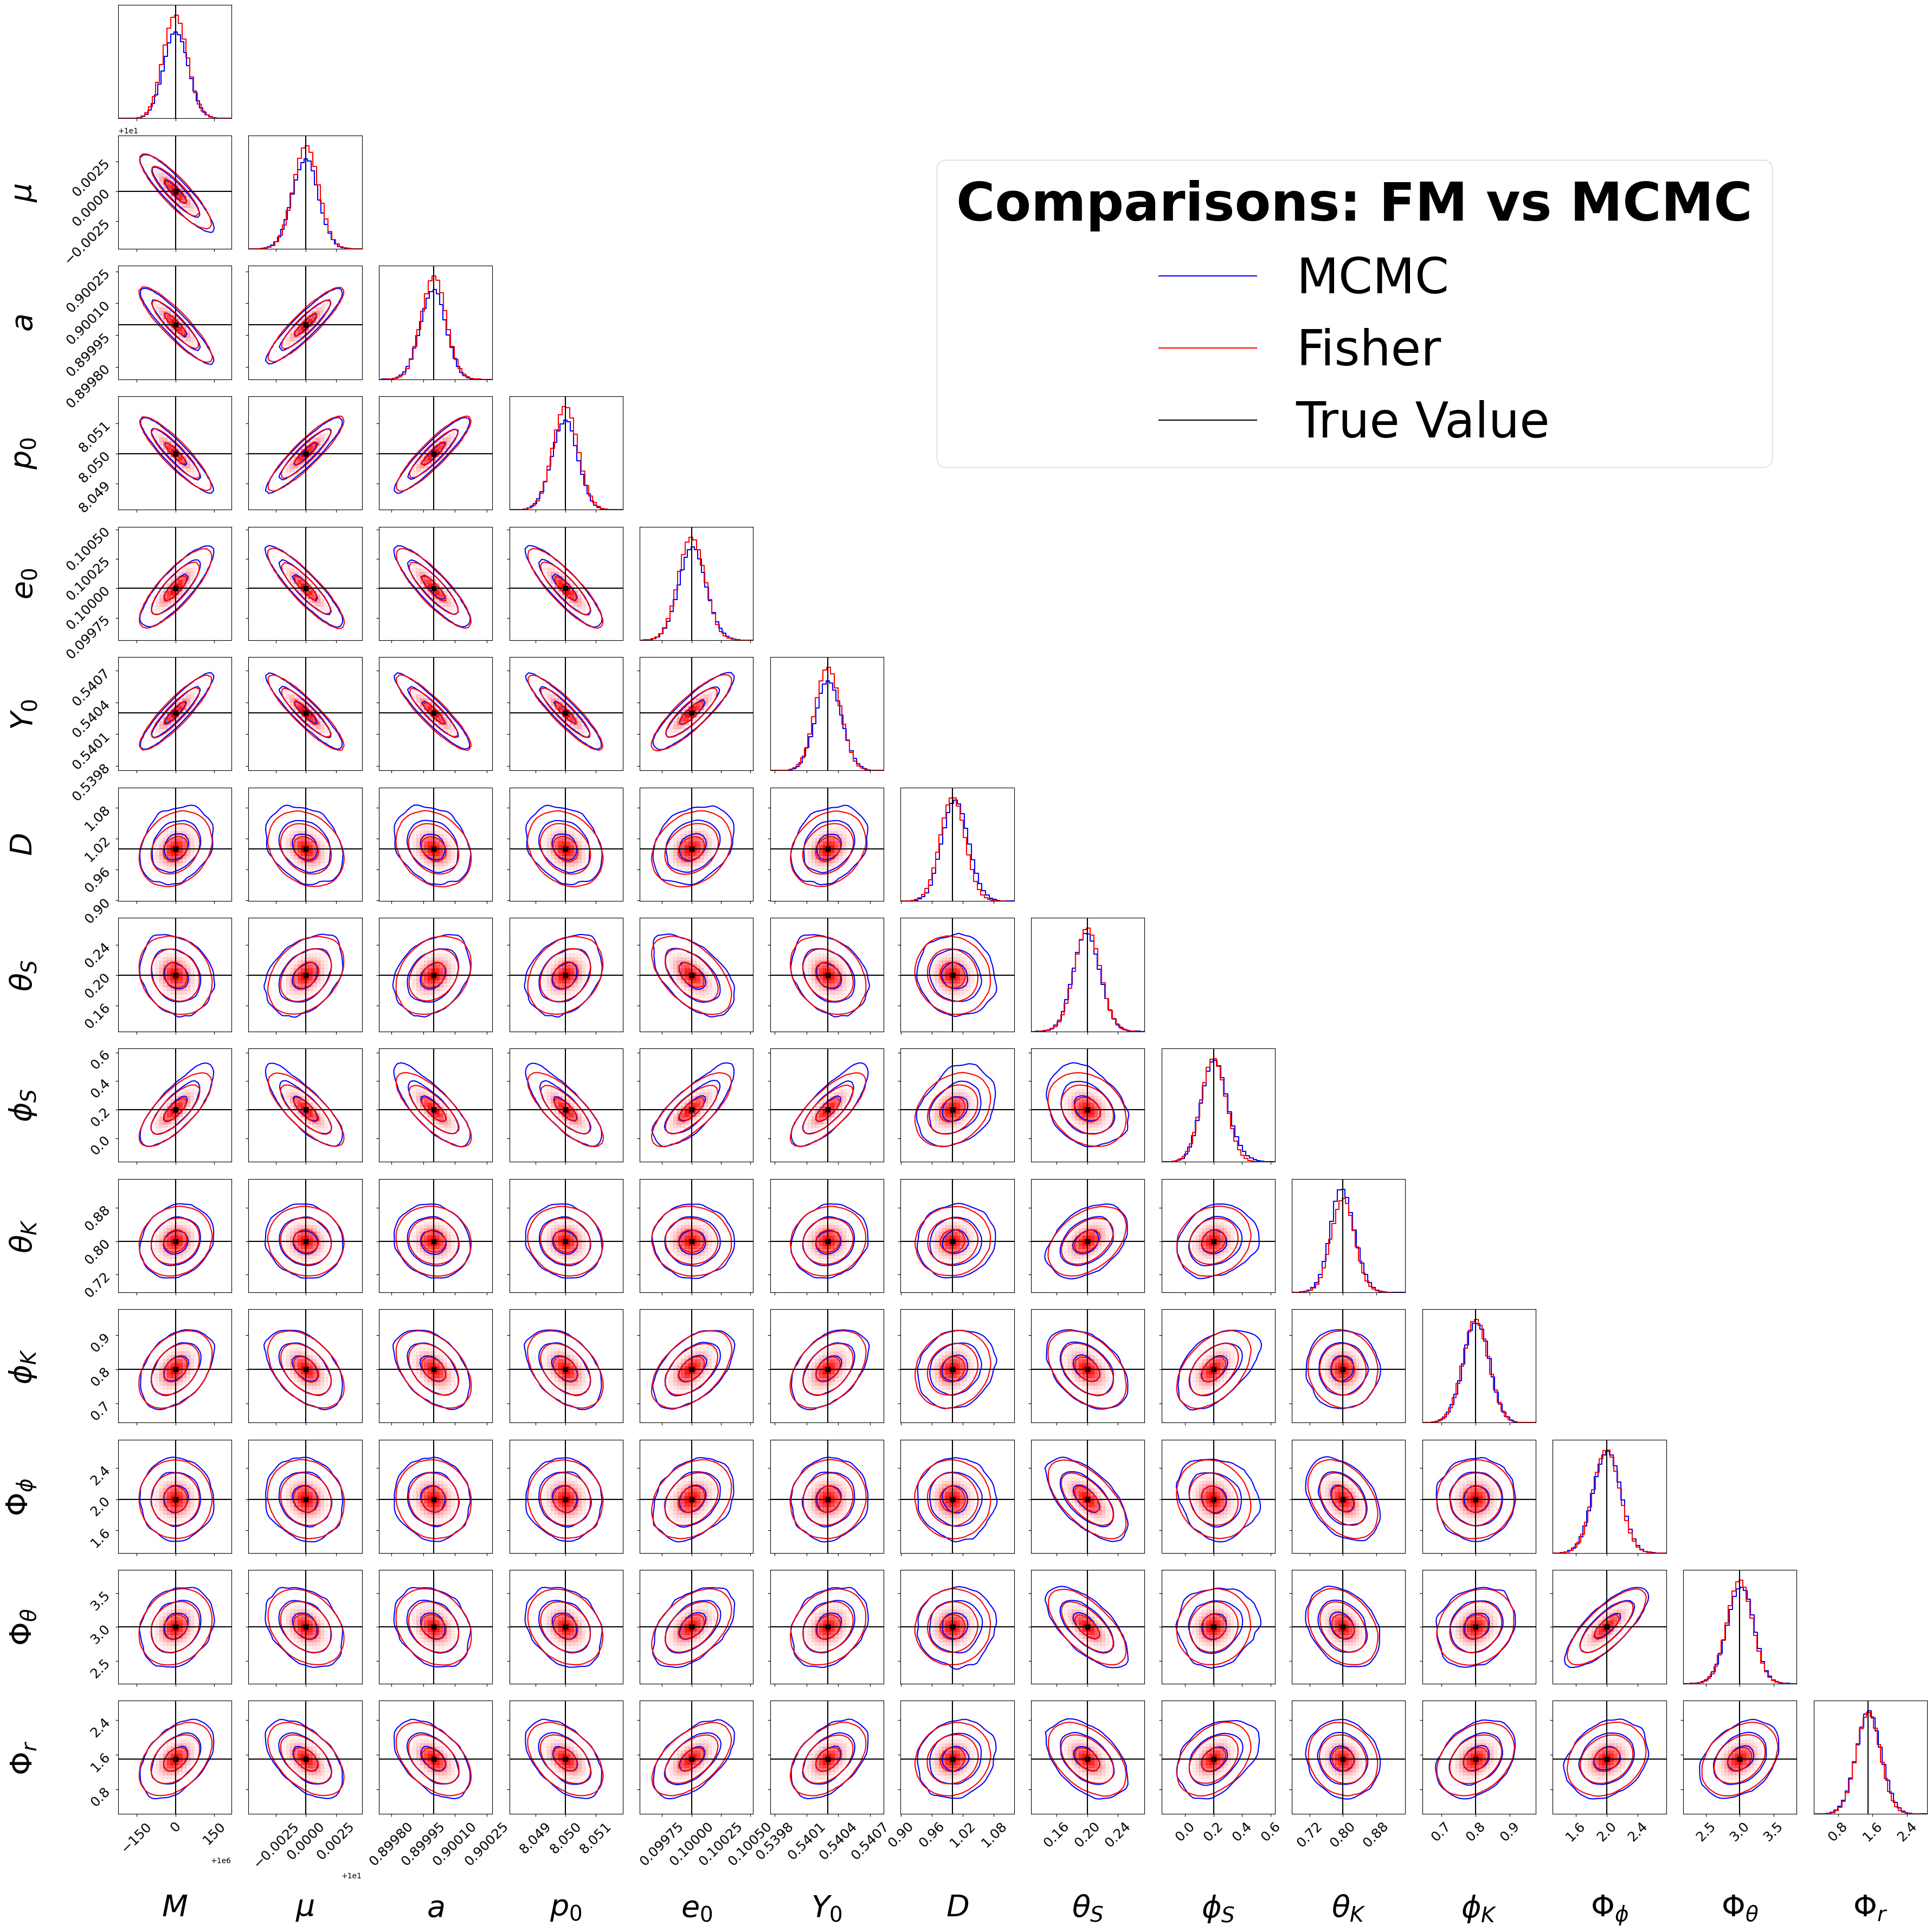

In [46]:
# 14D case -- corner plot

params =[r"$M$", r"$\mu$", r"$a$", r"$p_{0}$", r"$e_{0}$", "$Y_{0}$", "$D$",r"$\theta_{S}$", r"$\phi_{S}$", r"$\theta_{K}$", r"$\phi_{K}$", 
         r"$\Phi_{\phi}$",r"$\Phi_{\theta}$", r"$\Phi_{r}$"]  # Set up labels for corner plot

import corner
corner_kwargs = dict(plot_datapoints=False,smooth1d=True,
                       labels=params, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=40), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)  # Fancy plotting arguments

samples = np.column_stack(samples_14D)

figure = corner.corner(samples,bins = 30, color = 'blue', **corner_kwargs)  # MCMC corner plot

corner.corner(FM_samples_14D, fig = figure, bins = 30, color = 'red', **corner_kwargs)  # FM corner plot

axes = np.array(figure.axes).reshape((N_params_14D, N_params_14D))  # Construct axes

# Now set up vertical/horizontal lines indicating location of true parameters
for i in range(N_params_14D):
    ax = axes[i, i]
    ax.axvline(true_vals[i], color="k")
    
for yi in range(N_params_14D):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axhline(true_vals[yi], color="k")
        ax.axvline(true_vals[xi],color= "k")
        ax.plot(true_vals[xi], true_vals[yi], "sk")

# Tick sizes
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=18)

# Set up legend
blue_line = mlines.Line2D([], [], color='blue', label=r'MCMC')  # MCMC
red_line = mlines.Line2D([], [], color='red', label=r'Fisher')  # FM
black_line = mlines.Line2D([], [], color='black', label='True Value')  # Location of true parameter

# Place legend
plt.legend(handles=[blue_line,red_line,black_line], fontsize = 65, frameon = True, bbox_to_anchor=(-0.15, N_params_14D + 0.8), 
           loc="upper right", title = r"Comparisons: FM vs MCMC", 
           title_fontproperties = FontProperties(size = 70, weight = 'bold'))
plt.subplots_adjust(left=-0.1, bottom=-0.1, right=None, top=None, wspace=0.15, hspace=0.15) # Tidy up

plt.savefig("plots/comparison_plot.pdf")  # Save plot
plt.show() # Show
